<a href="https://colab.research.google.com/github/BrianBehnke/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# Import libraries

import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt

# Data comes from this webpage - http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival
# Data URL - http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data
# Set data variable
survival_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

# Raw data did not have column headers, so creating manually here
column_names = ["age", "year", "number of nodes", "survival status"]

# Import data into a dataframe
# Since the raw data was missing a header I removed it on import
survival_data = pd.read_csv(survival_data_url, header=None, names=column_names)


In [27]:
# Check header row of dataframe
survival_data.head(5)

,age,year,number of nodes,survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [28]:
# Verify number of observations in imported dataframe
# There should be 306 observations according to the raw data
survival_data.count()

age                306
year               306
number of nodes    306
survival status    306
dtype: int64

In [29]:
# Checking data for Null values
survival_data.isna().sum()

age                0
year               0
number of nodes    0
survival status    0
dtype: int64

In [32]:
surv_data_replaced.head(5)

NameError: ignored

In [33]:
# No Nulls, so no need to drop NAs
# Lets change the values on "survival staus" from 1/2 to 0/1
surv_data_replaced = survival_data['survival status'].replace([1], [0])
surv_data_replaced.head(5)

0    0
1    0
2    0
3    0
4    0
Name: survival status, dtype: int64

In [0]:
# TODO

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# Setting the display options for pandas display to enable larger amount of 
# info to be shown on screen
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [36]:
# Summary of data
print(survival_data.head())
print(survival_data.dtypes)
print(survival_data.isna().sum())
print(survival_data.describe())

   age  year  number of nodes  survival status
0   30    64                1                1
1   30    62                3                1
2   30    65                0                1
3   31    59                2                1
4   31    65                4                1
age                int64
year               int64
number of nodes    int64
survival status    int64
dtype: object
age                0
year               0
number of nodes    0
survival status    0
dtype: int64
              age        year  number of nodes  survival status
count  306.000000  306.000000       306.000000       306.000000
mean    52.457516   62.852941         4.026144         1.264706
std     10.803452    3.249405         7.189654         0.441899
min     30.000000   58.000000         0.000000         1.000000
25%     44.000000   60.000000         0.000000         1.000000
50%     52.000000   63.000000         1.000000         1.000000
75%     60.750000   65.750000         4.000000         2.00

In [37]:
# Makign crosstabs with the data
age_nodes_crosstab = pd.crosstab(survival_data['age'], survival_data['number of nodes'])
nodes_survival_crosstab = pd.crosstab(survival_data['number of nodes'], survival_data['survival status'])

print(age_nodes_crosstab)
print(nodes_survival_crosstab)

number of nodes  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  28  30  35  46  52
age                                                                                                                                        
30                1   1   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
31                0   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
33                1   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
34                2   1   0   0   0   0   0   1   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
35                1   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
36                1 

In [50]:
# Making bins for charting
age_bin = pd.cut(survival_data['age'], 5)
nodes_bin = pd.cut(survival_data['number of nodes'], 5)
survival_bin = pd.cut(survival_data['survival status'], 2)

# New crosstabs with bins
age_nodes_crosstab_bins = pd.crosstab(age_bin, nodes_bin)
nodes_survival_crosstab_bins = pd.crosstab(nodes_bin, survival_bin)

print(age_nodes_crosstab_bins)
print(nodes_survival_crosstab_bins)

number of nodes  (-0.052, 10.4]  (10.4, 20.8]  (20.8, 31.2]  (31.2, 41.6]  (41.6, 52.0]
age                                                                                    
(29.947, 40.6]               38             3             2             0             0
(40.6, 51.2]                 85            11             2             0             1
(51.2, 61.8]                 83             7             4             1             1
(61.8, 72.4]                 51             5             3             0             0
(72.4, 83.0]                  9             0             0             0             0
survival status  (0.999, 1.5]  (1.5, 2.0]
number of nodes                          
(-0.052, 10.4]            208          58
(10.4, 20.8]               11          15
(20.8, 31.2]                5           6
(31.2, 41.6]                0           1
(41.6, 52.0]                1           1


In [51]:
# We can make this a bit clearer by normalizing (getting %)
print(pd.crosstab(age_bin, nodes_bin, normalize='columns'))
print(pd.crosstab(nodes_bin, survival_bin, normalize='columns'))

number of nodes  (-0.052, 10.4]  (10.4, 20.8]  (20.8, 31.2]  (31.2, 41.6]  (41.6, 52.0]
age                                                                                    
(29.947, 40.6]         0.142857      0.115385      0.181818           0.0           0.0
(40.6, 51.2]           0.319549      0.423077      0.181818           0.0           0.5
(51.2, 61.8]           0.312030      0.269231      0.363636           1.0           0.5
(61.8, 72.4]           0.191729      0.192308      0.272727           0.0           0.0
(72.4, 83.0]           0.033835      0.000000      0.000000           0.0           0.0
survival status  (0.999, 1.5]  (1.5, 2.0]
number of nodes                          
(-0.052, 10.4]       0.924444    0.716049
(10.4, 20.8]         0.048889    0.185185
(20.8, 31.2]         0.022222    0.074074
(31.2, 41.6]         0.000000    0.012346
(41.6, 52.0]         0.004444    0.012346


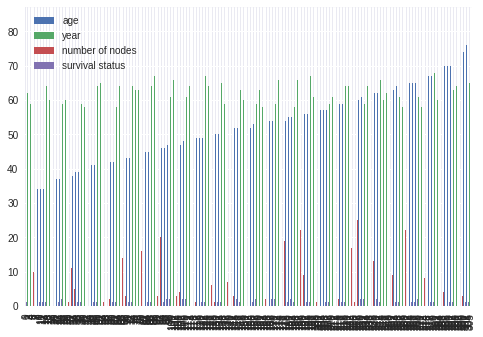

In [52]:
# Lets print the chart as is
survival_data.plot.bar();

In [53]:
# Chart is diffcult to read, lets try another way
crosstab_plot = pd.crosstab([survival_bin, nodes_bin], age_bin,
                 normalize='columns')
print (crosstab_plot)

age                              (29.947, 40.6]  (40.6, 51.2]  (51.2, 61.8]  (61.8, 72.4]  (72.4, 83.0]
survival status number of nodes                                                                        
(0.999, 1.5]    (-0.052, 10.4]         0.813953      0.636364      0.666667      0.677966      0.666667
                (10.4, 20.8]           0.069767      0.050505      0.020833      0.016949      0.000000
                (20.8, 31.2]           0.023256      0.000000      0.020833      0.033898      0.000000
                (31.2, 41.6]           0.000000      0.000000      0.000000      0.000000      0.000000
                (41.6, 52.0]           0.000000      0.000000      0.010417      0.000000      0.000000
(1.5, 2.0]      (-0.052, 10.4]         0.069767      0.222222      0.197917      0.186441      0.333333
                (10.4, 20.8]           0.000000      0.060606      0.052083      0.067797      0.000000
                (20.8, 31.2]           0.023256      0.020202   

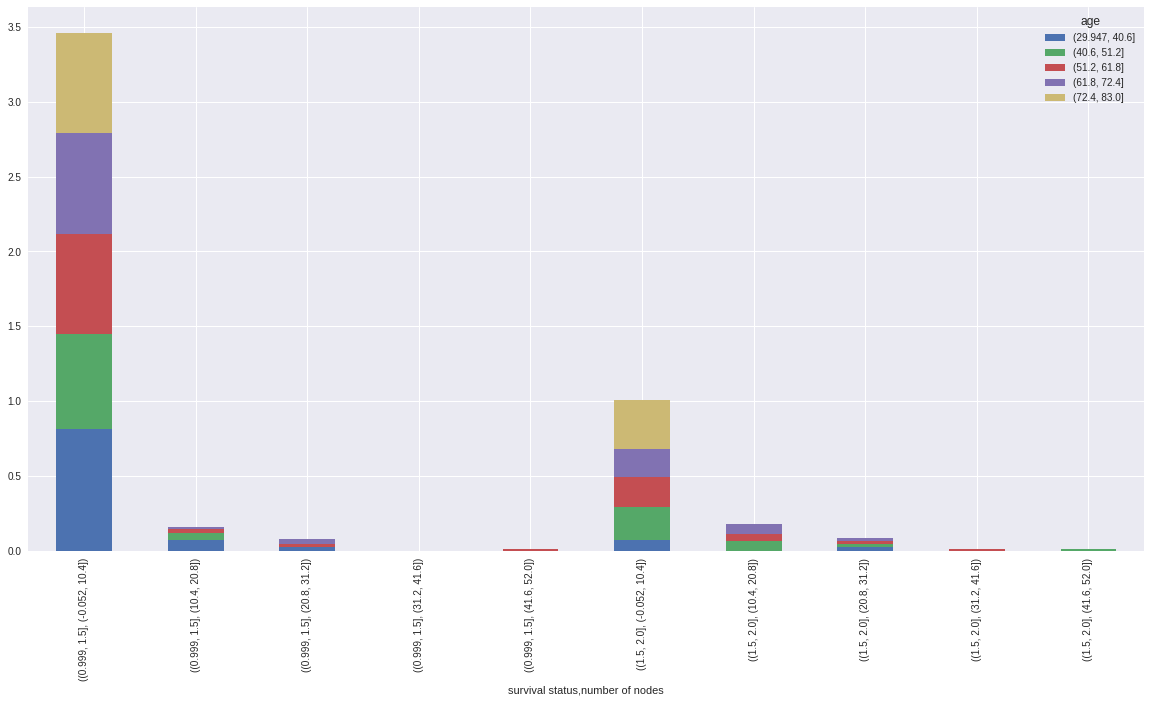

In [55]:
# Crosstab seems to get the data in a nice order for a chart
# Lets make a stacked bar chart
crosstab_plot.plot(kind='bar', stacked=True, figsize=(20,10));

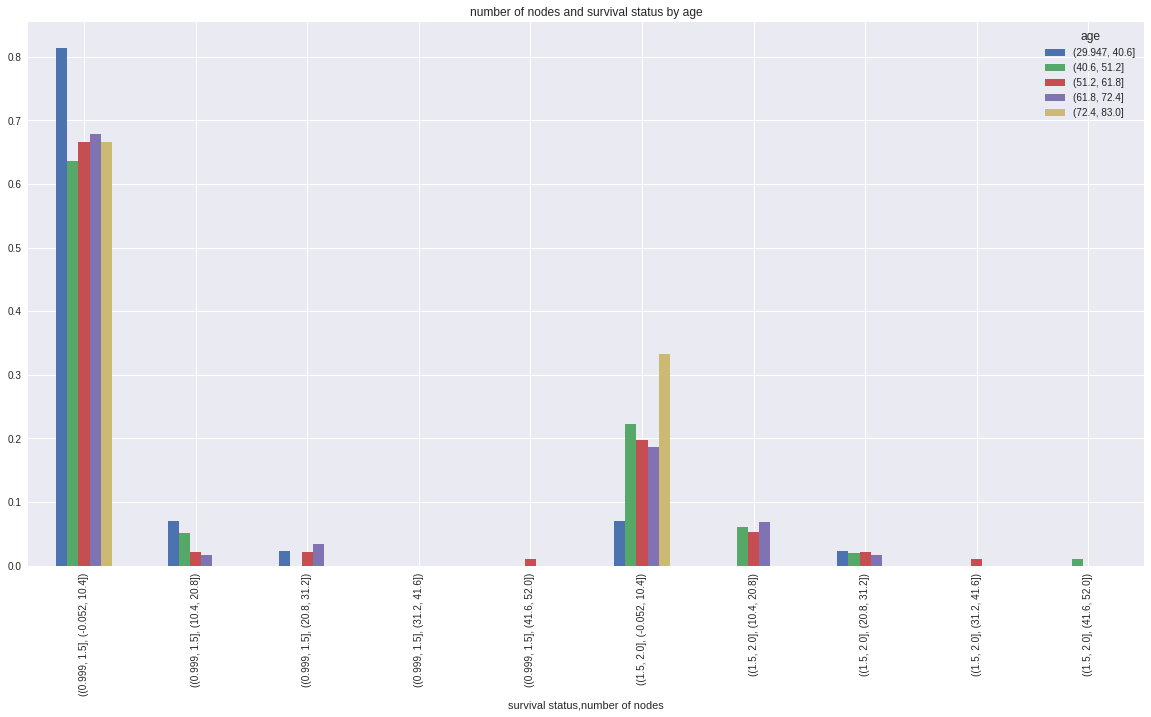

In [56]:
# Stacked is difficult to discern patterns and differences. 
# lets try a non=stacked bar chart
crosstab_plot.plot(kind='bar', stacked=False, figsize=(20,10), title='number of nodes and survival status by age');

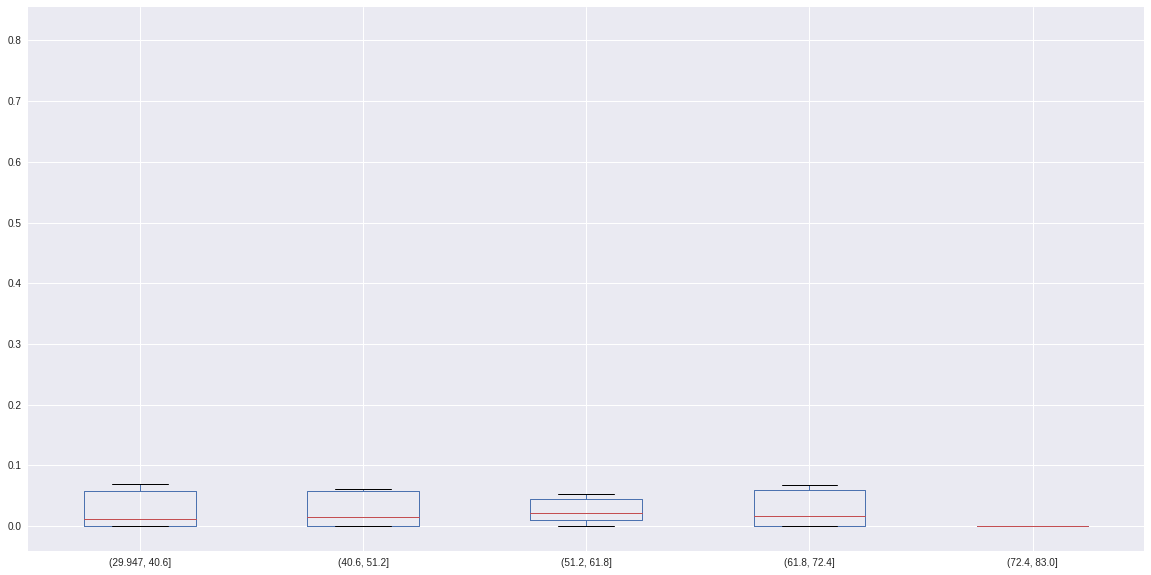

In [60]:
# Not the easiest chart to read, but looks nicer that the stacked bar chart
# lets see about a box plot
crosstab_plot.boxplot(figsize=(20,10));

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
- What is at least one feature that looks to have a negative correlation with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

# Positive correlation with survival

